In [1]:
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pathlib import Path
import seaborn as sns
import pandas as pd
import scipy.io
import cv2
import os
import numpy as np
plt.rcParams["animation.html"] = "html5"
%matplotlib inline

In [2]:
data_dir = os.path.join('.','data','*/')
files = glob(data_dir,recursive=True)
print(files)
data_counts = {f:glob(os.path.join(f,'*/')) for f in files}
for key,val in data_counts.items():
    print(f"{key} : {len(val)}")

['./data/valClips/', './data/trainClips/', './data/testClips/']
./data/valClips/ : 2230
./data/trainClips/ : 7770
./data/testClips/ : 3270


In [3]:
mat_file_name = os.path.join('.','data','q3_2_data.mat')
mat = scipy.io.loadmat(mat_file_name)

In [4]:
mat_keys = list(mat.keys())
train_labels = mat[mat_keys[-2]].reshape(-1,)
val_labels = mat[mat_keys[-1]].reshape(-1,)

In [5]:
val_labels.shape

(2230,)

In [6]:
len(train_labels)

7770

In [7]:
train_fnames_label = {'name':data_counts[files[1]],'labels':train_labels,'f_name':list(map(lambda x: Path(x).stem, data_counts[files[1]]))}
val_fnames_label = {'name':data_counts[files[0]],'labels':val_labels,'f_name':list(map(lambda x: Path(x).stem, data_counts[files[0]]))}
test_fnames_label = {'name':data_counts[files[2]],'f_name':list(map(lambda x: Path(x).stem, data_counts[files[2]]))}

In [8]:
df_train = pd.DataFrame(data=train_fnames_label, columns=['name','labels','f_name'])
df_val = pd.DataFrame(data=val_fnames_label, columns=['name','labels','f_name'])
df_test = pd.DataFrame(data=test_fnames_label, columns=['name','labels','f_name'])

[Text(0.5, 1.0, 'Split Distribution')]

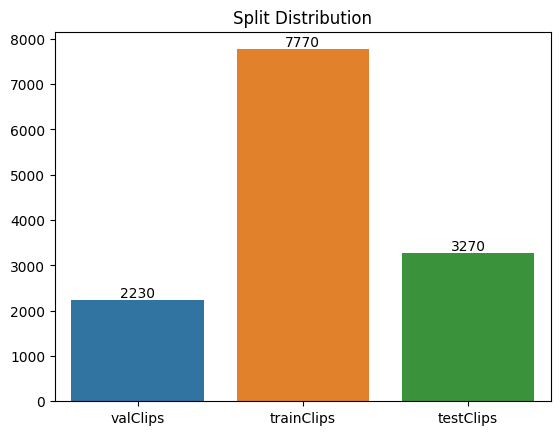

In [9]:
categories = [Path(f).stem for f in files]
category_counts = [len(data_counts[f]) for f in files]
ax = sns.barplot(x=categories,y=category_counts)
ax.bar_label(ax.containers[0])
ax.set(title="Split Distribution")

[Text(0.5, 1.0, 'Train Label Distribution')]

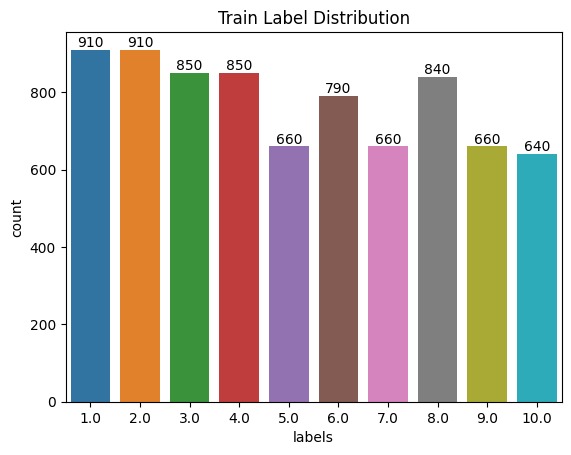

In [10]:
ax = sns.countplot(x="labels",data=df_train)
ax.bar_label(ax.containers[0])
ax.set(title="Train Label Distribution")

[Text(0.5, 1.0, 'Val Label Distribution')]

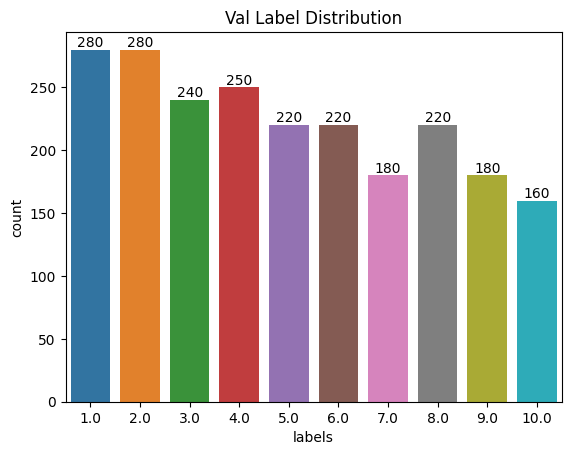

In [11]:
ax = sns.countplot(x="labels",data=df_val)
ax.bar_label(ax.containers[0])
ax.set(title="Val Label Distribution")

In [18]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image as Ima
from PIL import Image as Im

idxs = np.random.randint(0,len(df_train),size=9)
fig, ax = plt.subplots(3,3)

video_folders = [f"{df_train['name'][i]}*" for i in idxs]
imgs = [sorted(glob(v)) for v in video_folders]

# for idx,i in enumerate(idxs):
#     # x = np.arange(0, 2*np.pi, 0.01)
#     img = Im.open(imgs[0])
#     im= ax[idx//3][idx%3].imshow(img)

ims = [ax[i//3][i%3].imshow(imgs[i][0]) for i in range(9)]
# def init():
#     for k in range(9):
#         img = Im.open(imgs[k][0])
#         ims[k].set_data(img)
#     return ims,

def animate(k):
    for k in range(9):
        img = Im.open(imgs[k][0])
        ims[k].set_data(img)
    return ims

ani = animation.FuncAnimation(
    fig, animate, blit=True, save_count=50)

    # plt.show()